<a href="https://colab.research.google.com/github/charlie11438/note/blob/master/python_stats/stats0508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python統計筆記

## 2019-05-08

大樣本檢定

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
from scipy import stats

In [0]:
#生成隨機數據
n1=list(3*np.random.randn(1000)*4.5)
n2=list(3.5*np.random.randn(1000)*4.5)
original=pd.DataFrame()
original['sample1']=list(random.sample(n1,100))
original['sample2']=list(random.sample(n2,100))


In [3]:
original.head()

,sample1,sample2
0,-10.730150,-13.293053
1,-20.097163,5.043733
2,-0.080734,17.161896
3,-4.576666,0.960803
4,-14.290454,22.756505


## 敘述性統計

In [0]:
descri=pd.DataFrame()
des1=np.array(stats.describe(original.loc[:,'sample1']))
des2=np.array(stats.describe(original.loc[:,'sample2']))
indexlist=['n','(min,max)','mean','variance','skewness','kurtosis']
descri['sample1']=des1
descri['sample2']=des2
descri.index=indexlist

In [5]:
descri

,sample1,sample2
n,100,100
"(min,max)","(-40.704827377141264, 27.51272194144582)","(-56.7887814038731, 43.86461239097791)"
mean,0.232966,-1.10994
variance,196.027,298.67
skewness,-0.2975,-0.203619
kurtosis,-0.160113,0.654936


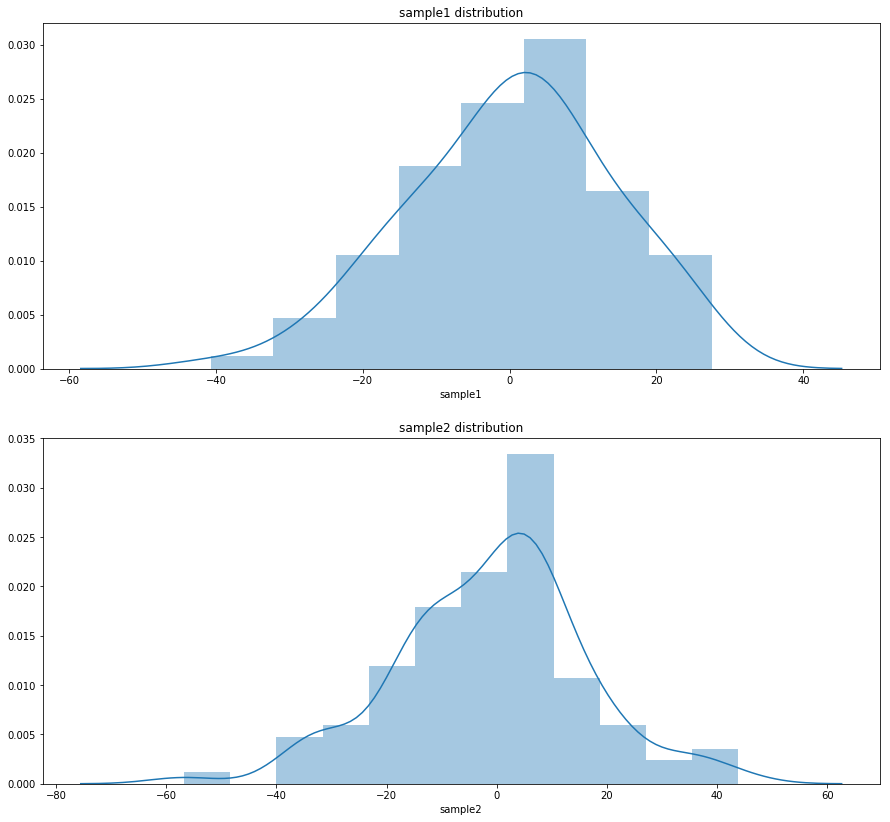

In [6]:
z0=plt.figure(figsize=(15,14))
z0.add_subplot(2,1,1)
sns.distplot(original.loc[:,'sample1'])
plt.title('sample1 distribution')
z0.add_subplot(2,1,2)
sns.distplot(original.loc[:,'sample2'])
plt.title('sample2 distribution')
plt.show()

# 95%信賴區間

stats.norm.interval(alpha,loc,scale)

alpha=信賴係數

loc=mean

scale=標準誤

In [7]:
print('sample1 95% 信賴區間:')
stats.norm.interval(0.05,loc=original.loc[:,'sample1'].mean(),scale=stats.sem(original.loc[:,'sample1']))

sample1 95% 信賴區間:


(0.14517012115070047, 0.3207613784792076)

In [8]:
print('sample2 95% 信賴區間:')
stats.norm.interval(0.05,loc=original.loc[:,'sample2'].mean(),scale=stats.sem(original.loc[:,'sample2']))

sample2 95% 信賴區間:


(-1.2183111276033611, -1.0015704993238805)

# 假說檢定

H0:mu1-mu2=0

H1:mu1-mu2!=0


檢定量z*=(xbar-ybar-0)/(sqrt(s1^2/n1)+sqrt(s2^2/n2))

alpha=0.05

雙尾檢定:

abs(z*)>=z(alpha/2) reject H0

In [0]:
def zstar(data1,data2):
  import math
  up=data1.mean()/data2.mean()
  s1=data1.std()
  s2=data2.std()
  n1=len(data1)
  n2=len(data2)
  down=math.sqrt((s1**2)/n1)+math.sqrt((s2**2)/n2)
  return up/down

In [10]:
alpha=0.05
teststats=zstar(original.loc[:,'sample1'],original.loc[:,'sample2'])
zalpha=stats.norm.pdf(alpha/2)
if math.fabs(teststats)>=zalpha:
  print('reject H0')
else:
  print('not reject H0')

not reject H0
